<a href="https://colab.research.google.com/github/laurenhaute/ntumis/blob/master/Copy_of_Module_3_Homework_NYC_rents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Error-based models in Python



This assignment will have you use linear regression to model New York City rent prices. The objective of this assignment is to:

*  Show you how to mount and load Google Drive so you can load stored csv files
*  Show you how to use the regression library in the scikit-learn package (sklearn)
*  Show you how to do basic data exploration and feature selection in Python
*  Show you how to visualize data in Plotly
*  Show you how to work with scikit-learn modeling objects


As always, we load the modules

In [ ]:
%load_ext google.colab.data_table
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Summary of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset $X$ and $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $X_i$ without a $Y$ value.  </li>
  <li> Model the <b>strength of the relationship</b> between each dependent variable $X_i$ and $Y$</li>
    <ul>
      <li> Sometimes not all $X_i$ will have a relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to determine $Y$ </li>
    </ul>
</ul>
</div>

### A brief recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is linearly related to the dependent variable $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. This is the simplest form of linear regression (one variable), we'll call this the simple model. 

* $\beta_0$ is the intercept of the linear model

* Multiple linear regression is when you have more than one independent variable
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 



***
# NYC Rentals Data Set

Data from this homework comes from [StreetEasy](www.streeteasy.com), an online platform for real estate listings in New York City. The sample provided covers 5,000 listings for homes for rent in Manhattan, Brooklyn, and Queens in June 2016 and provides several features of interest in modeling rents, including neighborhood, subway access, building amenities, 


Note that this data is provided for instructional purposes only and is not intended to be representative of all listings on StreetEasy or all homes for rent in New York City. Any analysis conducted as part of this exercise does not reflect the opinion or endorsement of StreetEasy or any of its affiliates.  


## Download the csv file

Download the StreetEasy data set here: [Dataset Link](https://drive.google.com/open?id=1Z9HSoUI-XpKHEkSOqJxHig8LnNMi3Ofz)

## Upload the file to your own Google Drive

Upload the file to your own Google Drive folder and remember the location where you saved the file.

## Mount Google Drive

On the left hand menu, select the folder icon. Then select "Mount Drive". You will get a notification to enter the authorization code in order to mount the drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Alter the code to load the csv file in your directory:

In [ ]:
se_df = pd.read_csv('/content/drive/My Drive/streeteasy.csv') ## CHANGE THIS LINE TO POINT TO YOUR OWN LOCATION WHERE YOU SAVED THE CSV FILE!!!!!!!!

In [ ]:
se_df

rental_id  building_id  ...            submarket    borough
0          1545     44518357  ...  All Upper East Side  Manhattan
1          2472     94441623  ...         All Downtown  Manhattan
2         10234     87632265  ...     Northwest Queens     Queens
3          2919     76909719  ...          All Midtown  Manhattan
4          2790     92953520  ...         All Downtown  Manhattan
...         ...          ...  ...                  ...        ...
4995       1964     73060494  ...     Northwest Queens     Queens
4996       5686     92994390  ...         All Downtown  Manhattan
4997       9679      7689663  ...         All Downtown  Manhattan
4998       5188     62828354  ...          All Midtown  Manhattan
4999       4718     67659586  ...         All Downtown  Manhattan

[5000 rows x 20 columns]

# Data Exploration

### Summary and Histogram for the Target Variable


In [ ]:
print(se_df.rent.describe())
fig = px.histogram(se_df, x="rent")
fig.show()

count     5000.000000
mean      4536.920800
std       2929.838953
min       1250.000000
25%       2750.000000
50%       3600.000000
75%       5200.000000
max      20000.000000
Name: rent, dtype: float64


## Homework question 1

* **What do you notice about the target feature's distribution?**
* **Is this surprising or unexpected?** 
* **How might this impact your model?**


### Your question 1 answer here


The distribution is normal but a little skewed to the right. This 100% matches my expection, since there are always richer people demanding better housing. The skewed part indicates there are plenty of outliers here, and if they were not eliminated before going into modeling, we might get a poor prediction.

## Homework question 2
If we wanted to try to create a model to price any given apartment, what variables might be the most important?
* **How many variables are available?**
* **Which are binary? Categorical? Continuous?** 
* **Which variable make most sense to use from an intuitive standpoint?**


### Your question 2 answer here

There are 18 variables in this dataset.

Binary: no_fee, has_roofdeck, has_washer_dryer, has_doorman, has_elevator, has_dishwasher, has_patio, has_gym 

Categorical: bedrooms, bathrooms, floor, neighborhood, submarket, borough

Continuous: rent, size_sqft, min_to_subway, building_age_yrs

The target variable has to be 'rent'.

## Homework question 3
*  **Create 3 separate scatterplots of `size_sqft` versus `rent`, `bathrooms` versus `rent`, and `floor` versus `rent`**
* **Describe the relationships you see. Is it positive or negative? Linear? Non-linear?** 

In [ ]:
# example code showing the scattter for size_sqft vs rent
fig = px.scatter(se_df, x="size_sqft", y="rent")
fig.show()

### Your question 3 answer here

size_sqft versus rent: There is a very clear positive relationship here. We can absolutely plot a line just by eyeballing the dots.

bathrooms versus rent: It is pretty clear that the two variables have a positive relationship. The more the bathrooms, the higher the rent.
 
floor versus rent: I don't really see a relation here, so I am assuming that the two variables are independent from other other.



In [ ]:
fig = px.scatter(se_df, x="size_sqft", y="rent")
fig.show()

In [ ]:
fig = px.scatter(se_df, x="bathrooms", y="rent")
fig.show()

In [ ]:
fig = px.scatter(se_df, x="floor", y="rent")
fig.show()

# Modeling

  

### Using `sklearn` for Multiple Linear Regression
`sklearn` is among the most popular packages for machine learning, and it's one we'll be using throughout the rest of the course. It's syntax and functionality is more or less standardized across all modeling methods. So using different models we'll encounter later on is almost as easy as changing the model. 


In [ ]:
# This creates a LinearRegression object
lm = LinearRegression()


#### Using a LinearRegression object

In [ ]:
# To look inside a linear regression object
# Type the below (<tab> means to use the tab key)
# lm.<tab>
lm.copy_X

True

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### Viewing the output

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

#### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

## Homework question 4

* **Find a reasonable set of predictors to fit the linear regression model.** 
* **List out the predictors that you use, show the code as in the example below.** 

(The example code below only uses 2 predictors. You should use as many as reasonable.)

In [ ]:
# Use sensible subset of predictors to fit linear regression model
dependent_vars = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'building_age_yrs',
                  'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
                  'has_dishwasher', 'has_patio', 'has_gym']

X = se_df[dependent_vars]

lm.fit(X, se_df.rent)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Your question 4 answer here

Predictors I use:

'bedrooms, 'bathrooms', 'size_sqft', 'min_to_subway', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym

In [ ]:
dependent_vars = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'building_age_yrs',
                  'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
                  'has_dishwasher', 'has_patio', 'has_gym']

X = se_df[dependent_vars]

lm.fit(X, se_df.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Question 5
Notice in the LinearRegression output, fit_intercept=True and normalize=True


* **How would you change the model to not fit an intercept term?**
* **What does that mean intuitively to have no intercept term?** 


### Your question 5 answer here

In [ ]:
# Put your question 5 code here.
lmm = LinearRegression(fit_intercept=False, normalize=True)

The equation for a straight line is 'Y=mX+c'. Intuitively, no intercept term/no c indicates that the two variable for sure meet at the value 0. The whole scatterplot is centered at the origin, making it very easy to identify the slope of the line even without the plot. We can effortlessly know where each case is located in the dataset. 

## Question 6
Estimated intercept and coefficients
***

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$


*  **Print out all the coefficient values for each variable you used for the linear regression.**




### Your question 6 answer here

In [ ]:
# Code for printing the coefficient values here
model = lm.fit(X, se_df.rent)
print(model.coef_)

[-517.01217173 1428.48906406    4.79641452  -18.3515624    -7.54512533
  -41.36212419   55.51013783  191.64119559   50.47548075  263.35542246
  -14.32183939   20.86624684  -75.77484984]


## Question 7
Predict Prices 
***

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$


*  **Plot the predicted rent prices and the actual rent prices to see how close your model captures the relationship to rent.**




In [ ]:
# example first five predicted prices
lm.predict(X)[0:5]

array([2990.8890576 , 9984.19000623, 3166.82300127, 4770.64550236,
       4888.90715806])

### Your question 7 answer here

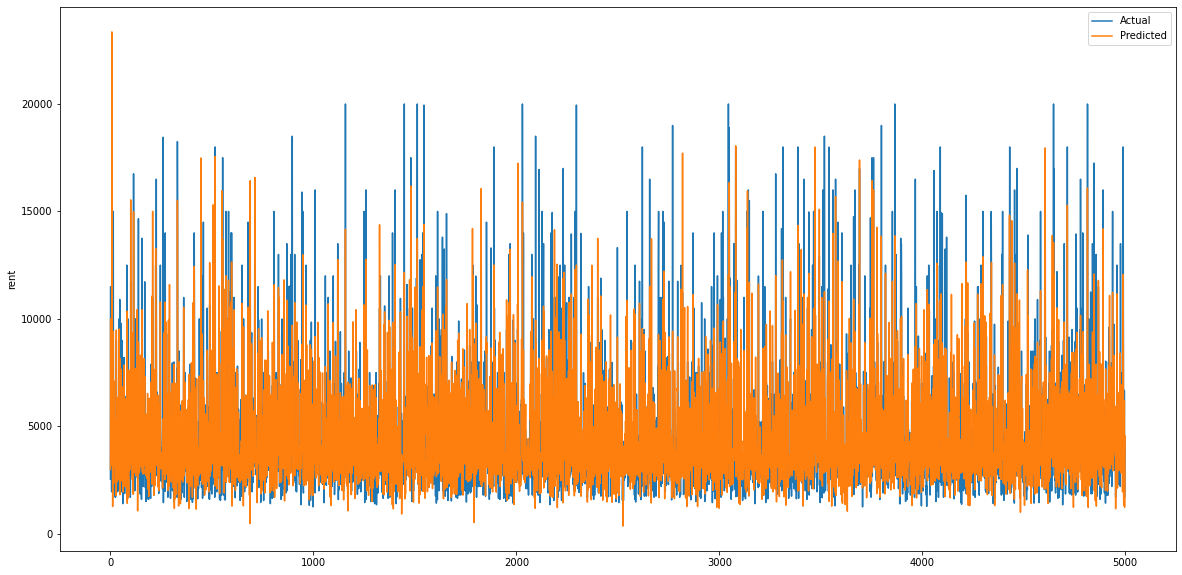

In [ ]:
## Your question 7 code here.
se_df.rent_pred = lm.predict(X)
df = pd.DataFrame({'Actual':se_df.rent, 'Predicted':se_df.rent_pred})

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Actual'], label='Actual')
plt.plot(df['Predicted'], label='Predicted')
plt.ylabel('rent')
plt.legend();

## Question 8
Residual sum of squares
***

Now let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

You can calculate this as:
`np.sum((se_df['rent'] - lm.predict(X)) ** 2))`

* **Calculate the residual sum of squares**


### Your question 8 answer here

In [ ]:
s = np.sum((se_df['rent'] - lm.predict(X)) ** 2)
print(s)

12218573112.852655


## Bonus question: Feature Engineering

Our original data set featured information on borough, submarket, neighborhood - all different ways of slices up the city in *geographic* terms. As the saying in real estate goes, "real estate is all about location, location, location".
* To what extent do you think models will return different results across different boroughs?
* How might you include some or all of these geographic areas in the model? 
* Construct the linear regression to predict rent prices based on location attributes in addition to the above features.

### Your bonus question answer (optional)